# Monty Hall problem
## Probabilistic programming model analysis for ascending door number

In [1]:
import timeit
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import networkx as nx

from problog import get_evaluatable
from problog.program import PrologString
from problog.formula import LogicFormula, LogicDAG
from problog.ddnnf_formula import DDNNF
from problog.cnf_formula import CNF


### import model problog model with embedded BP

In [2]:
with open('modelT.pl') as model:
    m = model.read()

In [3]:
lfs = []
dags = []
cnfs = []

### Evaluate model for door nubmer between $3$ to $11$

In [4]:
times = []
door_num = range(3, 12)
for i in door_num:
    start = timeit.default_timer()
    model = m.format(door_num=i)
    p = PrologString(model)
    formula = get_evaluatable().create_from(p)
    print(formula.evaluate())
    stop = timeit.default_timer()
    times.append(stop - start)

{event(0,h(3)): 0.6666666666666669, event(0,h(1)): 0.3333333333333329, event(0,h(2)): 0.0}
{event(0,h(4)): 0.37500000000000017, event(0,h(3)): 0.37500000000000017, event(0,h(1)): 0.24999999999999983, event(0,h(2)): 0.0}
{event(0,h(1)): 0.20000000000000007, event(0,h(4)): 0.2666666666666665, event(0,h(5)): 0.2666666666666665, event(0,h(3)): 0.2666666666666662, event(0,h(2)): 0.0}
{event(0,h(6)): 0.20833333333333323, event(0,h(1)): 0.16666666666666705, event(0,h(5)): 0.20833333333333323, event(0,h(4)): 0.20833333333333307, event(0,h(3)): 0.20833333333333323, event(0,h(2)): 0.0}
{event(0,h(3)): 0.1714285714285712, event(0,h(1)): 0.14285714285714315, event(0,h(7)): 0.1714285714285715, event(0,h(6)): 0.1714285714285715, event(0,h(5)): 0.1714285714285712, event(0,h(4)): 0.1714285714285712, event(0,h(2)): 0.0}
{event(0,h(3)): 0.14583333333333365, event(0,h(7)): 0.1458333333333334, event(0,h(8)): 0.1458333333333334, event(0,h(4)): 0.1458333333333334, event(0,h(6)): 0.14583333333333312, event(0

In [5]:
for i in door_num:
    model = m.format(door_num=i)
    p = PrologString(model)
    lf = LogicFormula.create_from(p)
    lfs.append(lf)
    dag = LogicDAG.create_from(lf)
    dags.append(dag)
    cnf = CNF.create_from(dag)
    cnfs.append(cnf)
 

In [6]:
pd.DataFrame(data={'Number Of Doors': door_num,
                   'Solving time': times,
                  'Lines in LF':[len(str(lf).split('\n')) for lf in lfs]})

,Number Of Doors,Solving time,Lines in LF
0,3,0.408666,48
1,4,0.387657,86
2,5,0.667958,155
3,6,1.141714,285
4,7,2.695006,536
5,8,8.097147,1029
6,9,29.334891,2001
7,10,114.841924,3935
8,11,438.986992,7790


In [7]:
print(lfs[0])

1: atom(identifier=(163, (0, 0.333333333333333, [0.333333333333333, 0.333333333333333], h(1), [h(2), h(3)]) {{}}, 0), probability=0.333333333333333, group=(163, (0, 0.333333333333333, [0.333333333333333, 0.333333333333333], h(1), [h(2), h(3)]) {{}}), name=event(0,h(1)), source=None)
2: atom(identifier=(163, (0, 0.5, [0.333333333333333], h(2), [h(3)]) {{}}, 0), probability=0.5, group=(163, (0, 0.5, [0.333333333333333], h(2), [h(3)]) {{}}), name=choice(163,0,_lists_sw_p(0,0.5,[0.333333333333333],h(2),[h(3)]),0,0.5,[0.333333333333333],h(2),[h(3)]), source=None)
3: conj(children=(2, -1), name=event(0,h(2)))
4: conj(children=(-1, -2), name=event(0,h(3)))
5: disj(children=(1, 3, 4), name=None)
6: atom(identifier=(163, (1, 0.333333333333333, [0.333333333333333, 0.333333333333333], g(1), [g(2), g(3)]) {{}}, 0), probability=0.333333333333333, group=(163, (1, 0.333333333333333, [0.333333333333333, 0.333333333333333], g(1), [g(2), g(3)]) {{}}), name=choice(163,0,_lists_sw_p(1,0.333333333333333,[0

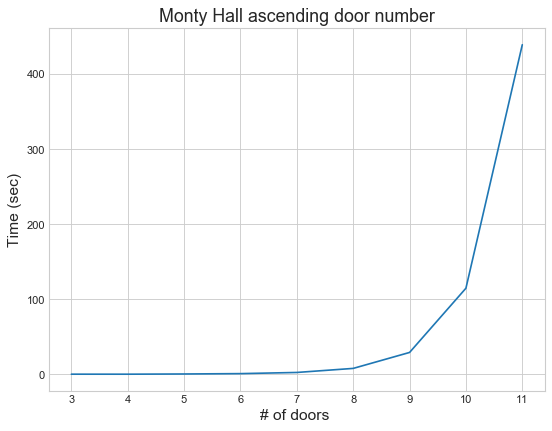

In [8]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(door_num, times)
plt.title('Monty Hall ascending door number',fontsize=16)
plt.ylabel('Time (sec)',fontsize=14)
plt.xlabel('# of doors ',fontsize=14)
plt.savefig('Monty Hall ascending door number.png')
plt.show()


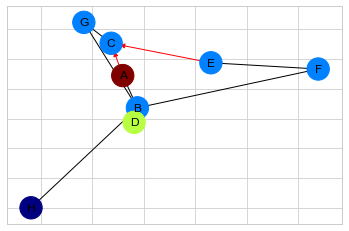

In [9]:
G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = [('A', 'C'), ('E', 'C')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()
